In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel('mall.xlsx')

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.drop('CustomerID', axis=1, inplace=True)

In [5]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [6]:
df.rename(columns={'Annual Income (k$)':'Income','Spending Score (1-100)':'Score'},inplace=True)

In [7]:
df.head()

,Gender,Age,Income,Score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [8]:
df.nunique()

Gender     2
Age       51
Income    64
Score     84
dtype: int64

# Visualization 

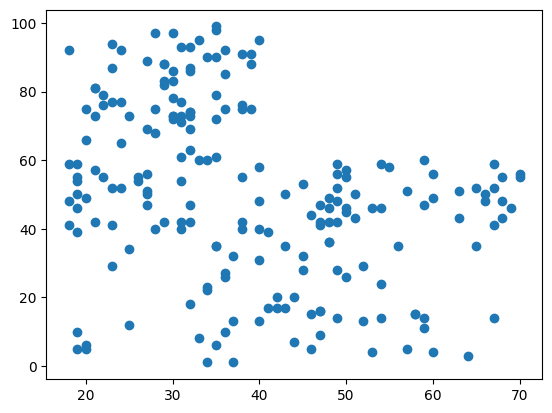

In [9]:
plt.scatter(df.Age,df.Score)

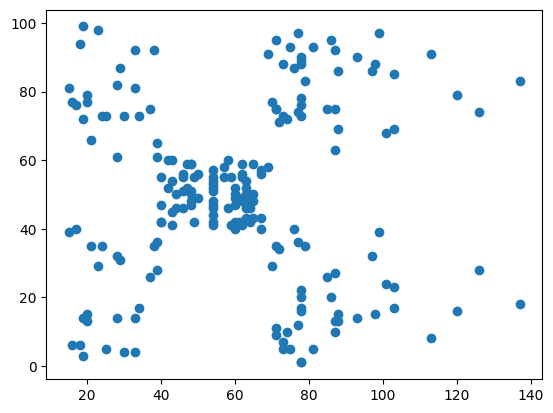

In [10]:
plt.scatter(df.Income,df.Score)

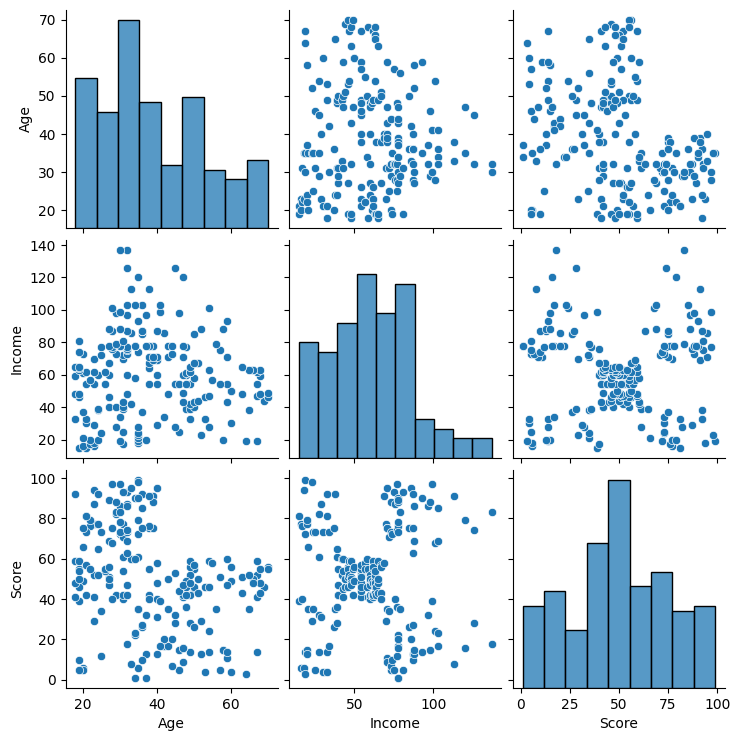

In [11]:
sns.pairplot(df[['Age','Income','Score']]) #For self histplot, for others scatterplot

In [12]:
import  sklearn.cluster as cluster

In [13]:
kmeans = cluster.KMeans()

In [14]:
pred = kmeans.fit_predict(df[['Income','Score']])

In [15]:
pred

array([4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5,
       4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 1, 5, 1, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 7, 0, 7, 2, 7, 0, 7, 0, 7,
       2, 7, 0, 7, 0, 7, 0, 7, 0, 7, 2, 7, 0, 7, 2, 7, 0, 7, 0, 7, 0, 7,
       0, 7, 0, 7, 0, 7, 2, 7, 0, 7, 0, 7, 0, 7, 0, 7, 0, 7, 0, 7, 0, 7,
       0, 7, 0, 3, 6, 3, 6, 3, 6, 3, 6, 3, 6, 3, 6, 3, 6, 3, 6, 3, 6, 3,
       6, 3])

In [16]:
df2 = df.copy()

In [17]:
df2.head()

,Gender,Age,Income,Score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [18]:
df2['Predicted'] = pred
df2.head()

,Gender,Age,Income,Score,Predicted
0,Male,19,15,39,4
1,Male,21,15,81,5
2,Female,20,16,6,4
3,Female,23,16,77,5
4,Female,31,17,40,4


In [19]:
centers = kmeans.cluster_centers_
centers

array([[ 79.73913043,  13.39130435],
       [ 45.97368421,  51.26315789],
       [ 62.58333333,  47.29166667],
       [108.18181818,  82.72727273],
       [ 25.14285714,  19.52380952],
       [ 25.0952381 ,  80.04761905],
       [109.7       ,  22.        ],
       [ 78.03571429,  81.89285714]])

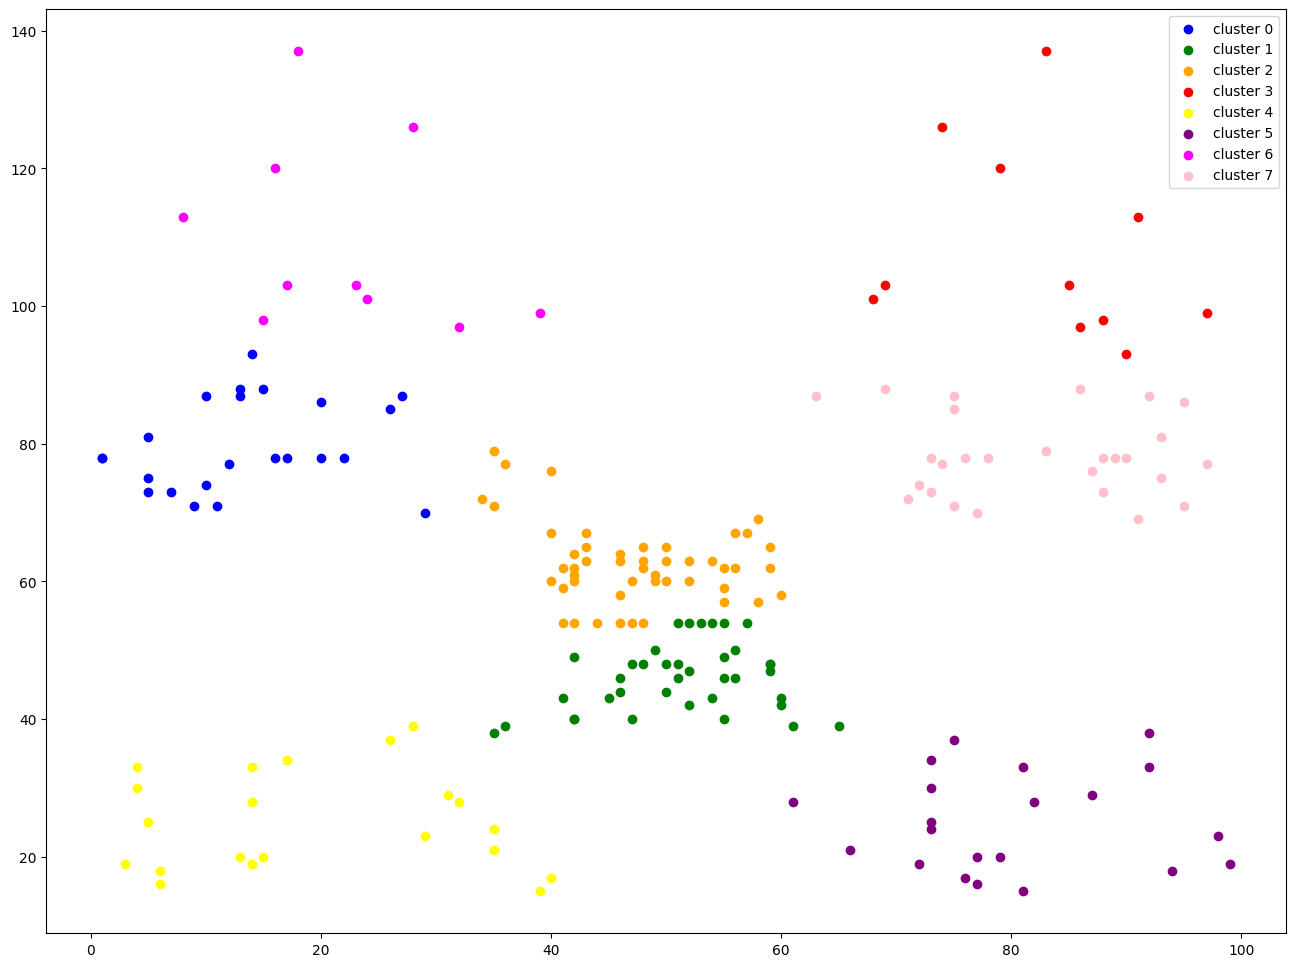

In [20]:
df0 = df2[df2.Predicted==0]
df1 = df2[df2.Predicted==1]
df8 = df2[df2.Predicted==2]
df3 = df2[df2.Predicted==3]
df4 = df2[df2.Predicted==4]
df5 = df2[df2.Predicted==5]
df6 = df2[df2.Predicted==6]
df7 = df2[df2.Predicted==7]



plt.figure(figsize=(16,12))
plt.scatter(df0['Score'],df0['Income'], color='blue',label='cluster 0')
plt.scatter(df1['Score'],df1['Income'], color='green',label='cluster 1')
plt.scatter(df8['Score'],df8['Income'], color='orange',label='cluster 2')
plt.scatter(df3['Score'],df3['Income'], color='red',label='cluster 3')
plt.scatter(df4['Score'],df4['Income'], color='yellow',label='cluster 4')
plt.scatter(df5['Score'],df5['Income'], color='purple',label='cluster 5')
plt.scatter(df6['Score'],df6['Income'], color='fuchsia',label='cluster 6')
plt.scatter(df7['Score'],df7['Income'], color='pink',label='cluster 7')
plt.legend()

In [21]:
df0.head()

,Gender,Age,Income,Score,Predicted
124,Female,23,70,29,0
128,Male,59,71,11,0
130,Male,47,71,9,0
134,Male,20,73,5,0
136,Female,44,73,7,0


In [22]:
df1.head()

,Gender,Age,Income,Score,Predicted
40,Female,65,38,35,1
42,Male,48,39,36,1
43,Female,31,39,61,1
45,Female,24,39,65,1
46,Female,50,40,55,1


# Elbow Method

In [23]:
from sklearn.cluster import KMeans

In [24]:
wcss = []

In [25]:
cluster = range(1,15)

for k in cluster:
    kmean = KMeans(n_clusters=k)
    kmean.fit(df[['Income', 'Score']])
    wcss.append(kmean.inertia_)

In [26]:
wcss

[269981.28,
 181363.595959596,
 106348.37306211119,
 73679.78903948837,
 44448.45544793371,
 37233.81451071001,
 30259.65720728547,
 24995.969781135962,
 21829.135638779822,
 19664.685196005543,
 18031.09945939576,
 15814.933389191454,
 14350.256180094417,
 13257.025570980742]

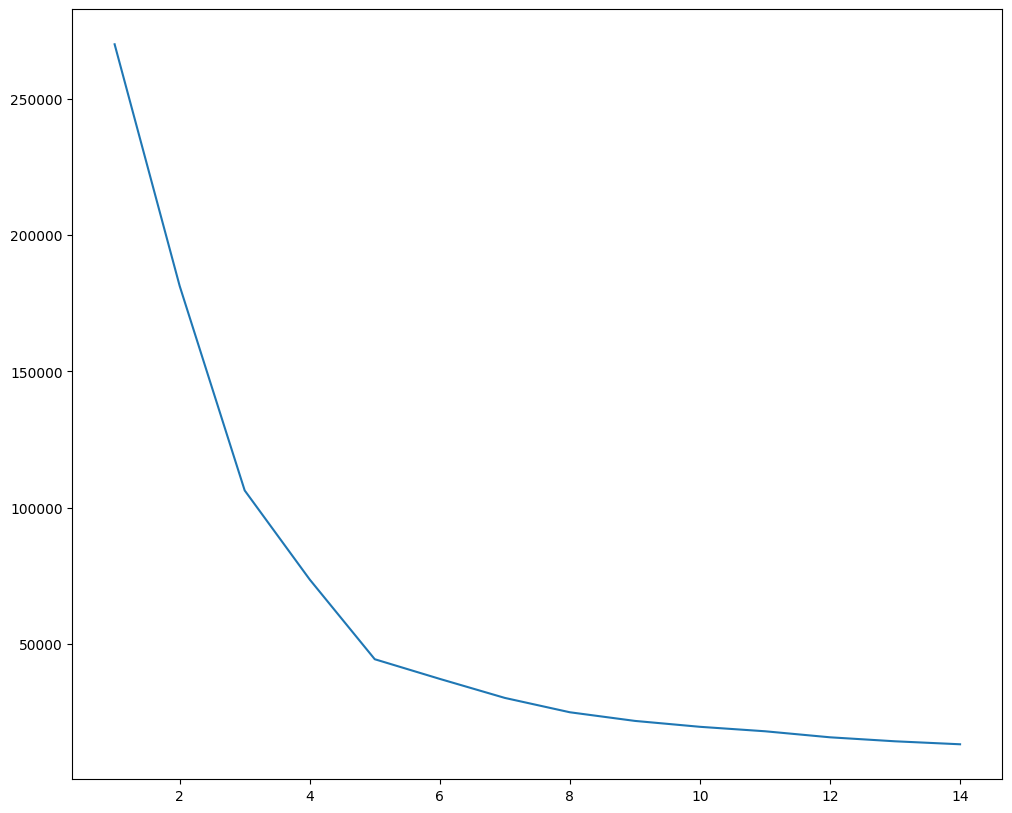

In [27]:
plt.figure(figsize=(12,10))
plt.plot(cluster,wcss)

In [28]:
!pip install kneed

In [29]:
!pip install --upgrade kneed

In [30]:
from kneed import KneeLocator

In [31]:
kn = KneeLocator(cluster,wcss,direction='decreasing',curve='convex')

In [32]:
kn

In [33]:
print('optimal number of cluster is: ',kn.knee)

optimal number of cluster is:  5


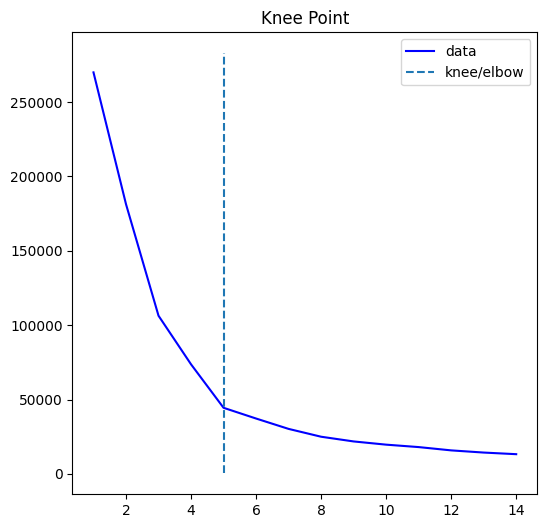

In [34]:
kn.plot_knee()

# After select best k

In [35]:
import sklearn.cluster as cluster
kmeans = cluster.KMeans(n_clusters=5)

In [36]:
predicted = kmeans.fit_predict(df[['Income','Score']])

In [37]:
predicted

array([1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 3,
       1, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 2, 0, 3, 0, 2, 0, 2, 0,
       3, 0, 2, 0, 2, 0, 2, 0, 2, 0, 3, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0])

In [38]:
df['Predicted'] = predicted

In [39]:
df.head()

,Gender,Age,Income,Score,Predicted
0,Male,19,15,39,1
1,Male,21,15,81,4
2,Female,20,16,6,1
3,Female,23,16,77,4
4,Female,31,17,40,1


In [40]:
center2 = kmeans.cluster_centers_

In [41]:
center2

array([[86.53846154, 82.12820513],
       [26.30434783, 20.91304348],
       [88.2       , 17.11428571],
       [55.2962963 , 49.51851852],
       [25.72727273, 79.36363636]])

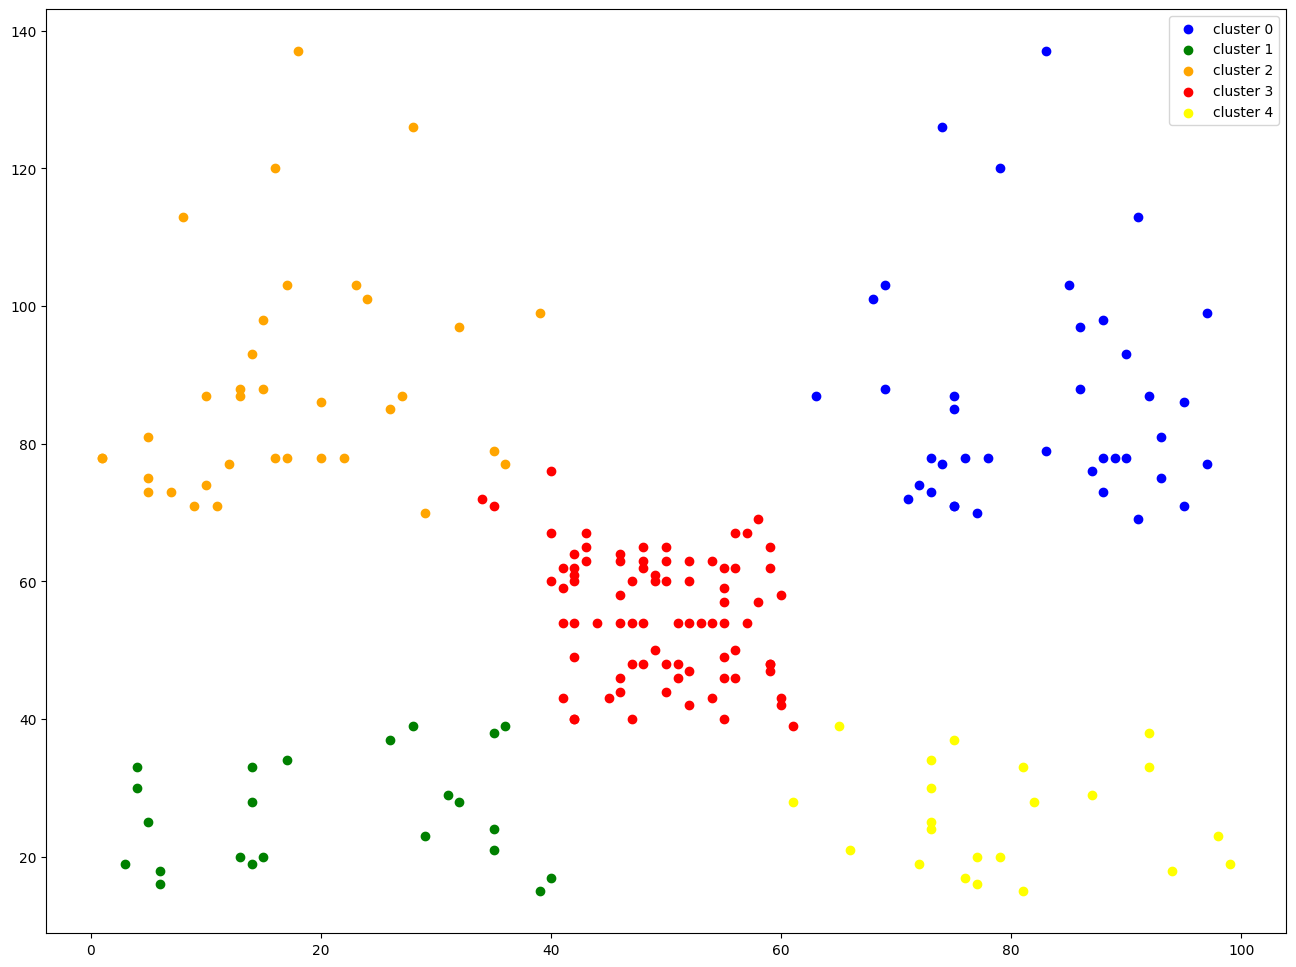

In [42]:
df0 = df[df.Predicted==0]
df1 = df[df.Predicted==1]
df2 = df[df.Predicted==2]
df3 = df[df.Predicted==3]
df4 = df[df.Predicted==4]




plt.figure(figsize=(16,12))
plt.scatter(df0['Score'],df0['Income'], color='blue',label='cluster 0')
plt.scatter(df1['Score'],df1['Income'], color='green',label='cluster 1')
plt.scatter(df2['Score'],df2['Income'], color='orange',label='cluster 2')
plt.scatter(df3['Score'],df3['Income'], color='red',label='cluster 3')
plt.scatter(df4['Score'],df4['Income'], color='yellow',label='cluster 4')

plt.legend()